In [1]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep=';')
df

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36898,159,10,2025,2025m10,35,4,Cachoeiras de Macacu,3300803,Interior,1,...,4.0,0.0,37,2,0,0,0,0,163,2
36899,165,10,2025,2025m10,33,5,Mangaratiba,3302601,Interior,1,...,4.0,0.0,21,0,0,0,0,0,196,2
36900,166,10,2025,2025m10,33,5,Angra dos Reis,3300100,Interior,3,...,12.0,0.0,82,8,0,1,0,0,682,2
36901,167,10,2025,2025m10,43,5,Paraty,3303807,Interior,1,...,2.0,1.0,11,1,0,0,0,0,195,2


In [ ]:
df_furto_celular_dp = df.groupby('cisp')['furto_celular'].sum().reset_index()
df_furto_celular_dp =  df_furto_celular_dp.sort_values(by='furto_celular', ascending = False)
df_furto_celular_dp

In [ ]:
array_furto_celular = np.array(df_furto_celular_dp['furto_celular'])
media_furto_celular = np.mean(array_furto_celular)
mediana_furto_celular = np.median(array_furto_celular)
q1_furto_celular = np.quantile(array_furto_celular, 0.25)
q2_furto_celular = np.quantile(array_furto_celular, 0.50)
q3_furto_celular = np.quantile(array_furto_celular, 0.75)
distancia = (media_furto_celular-mediana_furto_celular)/ mediana_furto_celular

iqr = q3_furto_celular - q1_furto_celular
limite_superior = q3_furto_celular + 1.5 * iqr
limite_inferior = q1_furto_celular - 1.5 * iqr


In [ ]:
print(f'A média é {media_furto_celular}')
print(f'A mediana é {mediana_furto_celular}')
print(f'Primeiro quartil (Q1): {q1_furto_celular}')
print(f'Segundo quartil (Q2, Mediana): {q2_furto_celular}')
print(f'Terceiro quartil (Q3): {q3_furto_celular}')
print(f'a distancia entre a média e a mediana é: {distancia}')
print(f'o valor do limite superior é: {limite_superior}')
print(f'o valor do limite inferior é: {limite_inferior}')


In [ ]:
df_furto_celular_q3 = df_furto_celular_dp.loc[df_furto_celular_dp['furto_celular'] > q3_furto_celular]
df_furto_celular_q1 = df_furto_celular_dp.loc[df_furto_celular_dp['furto_celular'] < q1_furto_celular]
outliers_furto_celular = df_furto_celular_dp.loc[df_furto_celular_dp['furto_celular'] > limite_superior]
outliers_furto_celular


In [ ]:
df_furto_celular_q3.head(10)

In [ ]:
df_furto_celular_q1 = df_furto_celular_q1.sort_values(by='furto_celular', ascending = True)
df_furto_celular_q1.head(10)
                        

In [36]:
df['roubo_furto_veiculo'] = df['roubo_veiculo'] + df['furto_veiculos']
df_veiculo_rj = df.loc[(df['regiao'] == 'Capital')]
df_veiculo_rj

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,roubo_furto_veiculo
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,21,2,0,0,0,0,578,3,17
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,15,6,0,1,0,0,441,3,18
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,47,2,1,0,0,0,637,3,39
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,26,2,1,0,0,0,473,3,44
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,10,1,3,0,0,0,147,3,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36802,40,10,2025,2025m10,9,2,Rio de Janeiro,3304557,Capital,4,...,0.0,25,5,1,0,0,0,628,2,69
36803,41,10,2025,2025m10,18,2,Rio de Janeiro,3304557,Capital,0,...,0.0,49,0,0,0,0,0,856,2,35
36804,42,10,2025,2025m10,31,2,Rio de Janeiro,3304557,Capital,3,...,2.0,102,6,3,0,0,0,1450,2,79
36805,43,10,2025,2025m10,27,2,Rio de Janeiro,3304557,Capital,2,...,1.0,110,13,1,0,0,0,691,2,22


In [ ]:
df_veiculo_dp = df_veiculo_rj.groupby('cisp')['roubo_furto_veiculo'].sum().reset_index()
df_veiculo_dp =  df_veiculo_dp.sort_values(by='roubo_furto_veiculo', ascending = False)
df_veiculo_dp

In [ ]:
array_veiculo = np.array(df_veiculo_dp['roubo_furto_veiculo']) 
media_veiculo = np.mean(array_veiculo)
mediana_veiculo = np.median(array_veiculo)
q1_veiculo = np.quantile(array_veiculo, 0.25)
q2_veiculo = np.quantile(array_veiculo, 0.50)
q3_veiculo = np.quantile(array_veiculo, 0.75)
distancia_veiculo = (media_veiculo-mediana_veiculo)/ mediana_veiculo
iqr_veiculo = q3_veiculo - q1_veiculo
limite_superior_veiculo = q3_veiculo + 1.5 *iqr_veiculo
limite_inferior_veiculo = q1_veiculo - 1.5 *iqr_veiculo
    

In [ ]:
print(f'A média é {media_veiculo}')
print(f'A mediana é {mediana_veiculo}')
print(f'Primeiro quartil (Q1): {q1_veiculo}')
print(f'Segundo quartil (Q2, Mediana): {q2_veiculo}')
print(f'Terceiro quartil (Q3): {q3_veiculo}')
print(f'a distancia entre a média e a mediana é: {distancia_veiculo}')
print(f'o valor do limite superior é: {limite_superior_veiculo}')
print(f'o valor do limite inferior é: {limite_inferior_veiculo}')

In [43]:
outliers_veiculo = df_veiculo_dp.loc[df_veiculo_dp['roubo_furto_veiculo'] > limite_superior_veiculo]
outliers_veiculo

,cisp,roubo_furto_veiculo
23,27,39024


In [ ]:
df_veiculo_metropole = df.loc[(df['regiao'] != 'Interior' )]
df_veiculo_metropole = df_veiculo_metropole.loc[(df_veiculo_metropole[('ano')]  >= 2015 )]
df_veiculo_metropole = df_veiculo_metropole.groupby('munic')['roubo_furto_veiculo'].sum().reset_index()
df_veiculo_metropole =  df_veiculo_metropole.sort_values(by='roubo_furto_veiculo', ascending = False)
df_veiculo_metropole

In [39]:
array_metropole = np.array(df_veiculo_metropole['roubo_furto_veiculo'])
media_metropole = np.mean(array_metropole)
mediana_metropole = np.median(array_metropole)
q1_metropole = np.quantile(array_metropole, 0.25)
q2_metropole = np.quantile(array_metropole, 0.50)
q3_metropole = np.quantile(array_metropole, 0.75)
distancia_metropole = (media_metropole-mediana_metropole)/ mediana_metropole
iqr_metropole = q3_metropole - q1_metropole
limite_superior_metropole = q3_metropole + 1.5 * iqr_metropole
limite_inferior_metropole = q1_metropole - 1.5 * iqr_metropole


In [ ]:
print(f'A média é {media_metropole}')
print(f'A mediana é {mediana_metropole}')
print(f'Primeiro quartil (Q1): {q1_metropole}')
print(f'Segundo quartil (Q2, Mediana): {q2_metropole}')
print(f'Terceiro quartil (Q3): {q3_metropole}')
print(f'a distancia entre a média e a mediana é: {distancia_metropole}')
print(f'o valor do limite superior é: {limite_superior_metropole}')
print(f'o valor do limite inferior é: {limite_inferior_metropole}')

In [42]:
outliers_metropole = df_veiculo_metropole.loc[df_veiculo_metropole['roubo_furto_veiculo'] > limite_superior_veiculo]
outliers_metropole

,munic,roubo_furto_veiculo
13,Rio de Janeiro,261534
1,Duque de Caxias,47522
15,São Gonçalo,47170


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

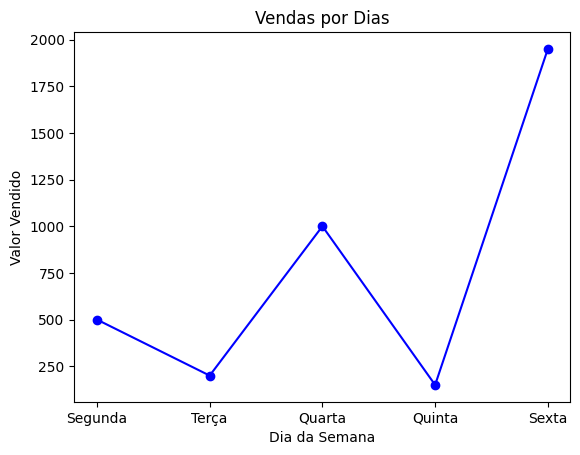

In [3]:
df = pd.DataFrame({
'dias': ['Segunda', 'Terça', 'Quarta', 'Quinta', 
'Sexta'],
'Venda': [500, 200, 1000, 150, 1950]})
plt.plot(df['dias'], df['Venda'], marker='o', 
linestyle='-', color='blue')
plt.title('Vendas por Dias')
plt.xlabel('Dia da Semana')
plt.ylabel('Valor Vendido')
plt.show()